<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/nzLNh10X/5d.png" style="display: block; margin-left: auto; margin-right: auto;">

![](http://www.diabeteshealth.com/wp-content/uploads/2016/12/diabetes.jpg)

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Loading Dataset</p>


In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
data = pd.read_csv('diabetes.csv') 



In [6]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()      #description of dataset 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.shape    #768 rows and 9 columns

(768, 9)

In [10]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
data.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Exploratory Data Analysis</p>

In [16]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


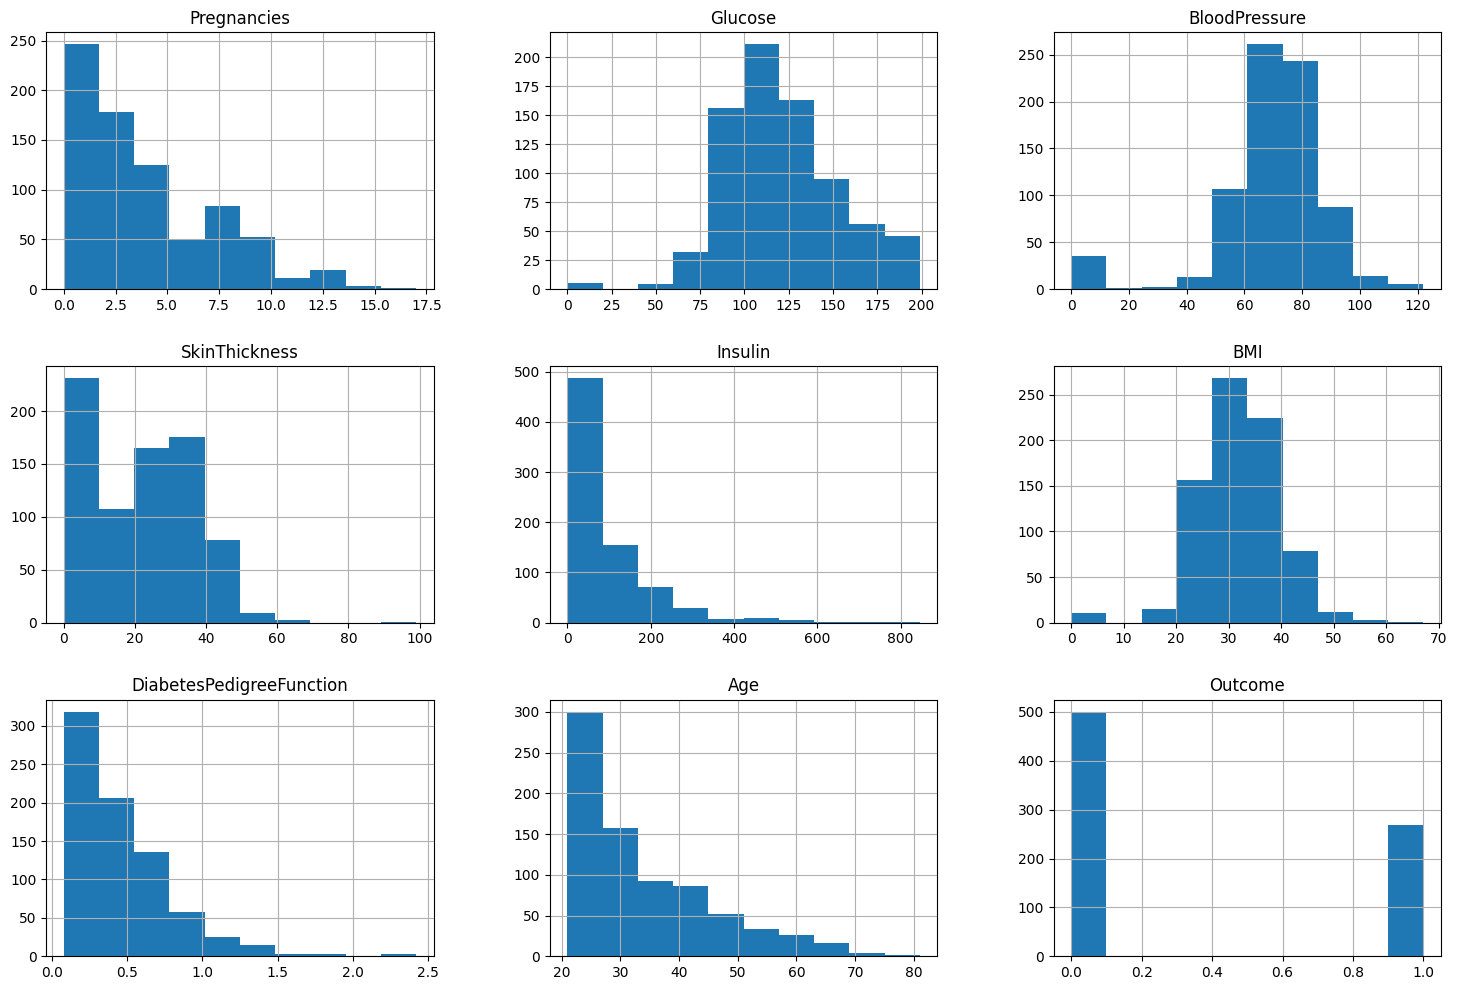

In [18]:
data.hist(figsize=(18,12))
plt.show()



<Axes: xlabel='SkinThickness'>

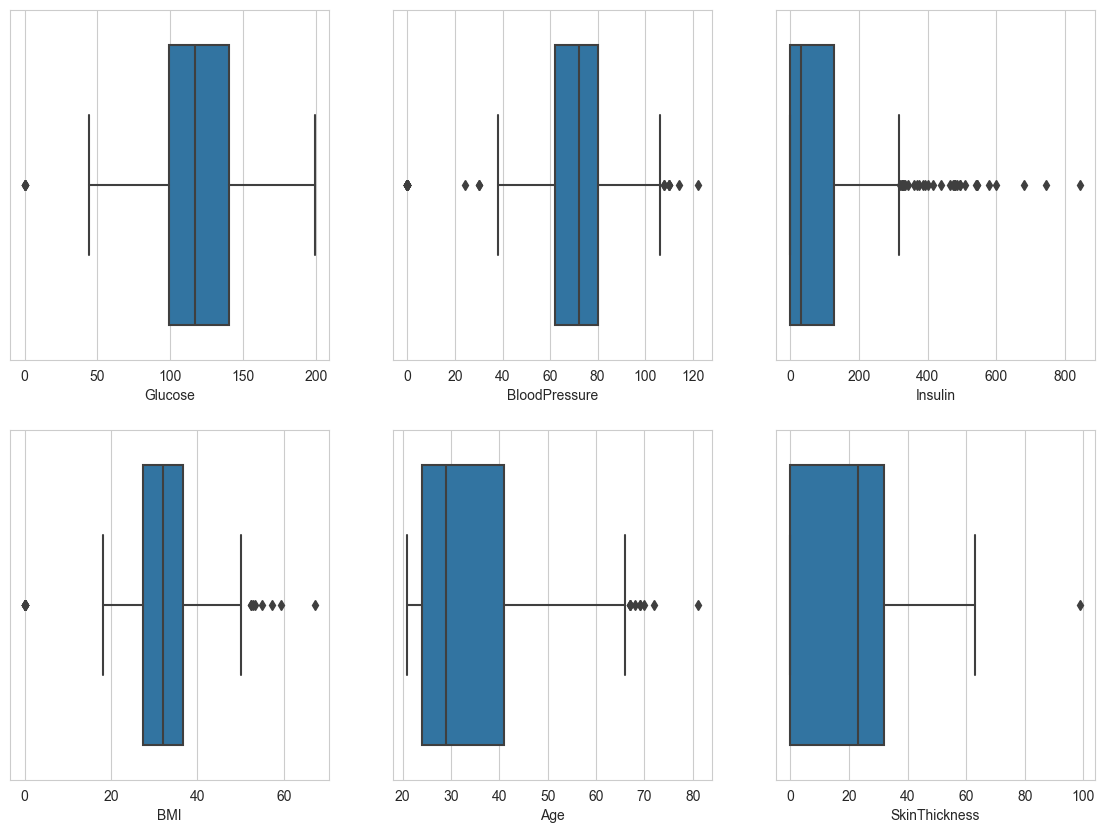

In [19]:

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)







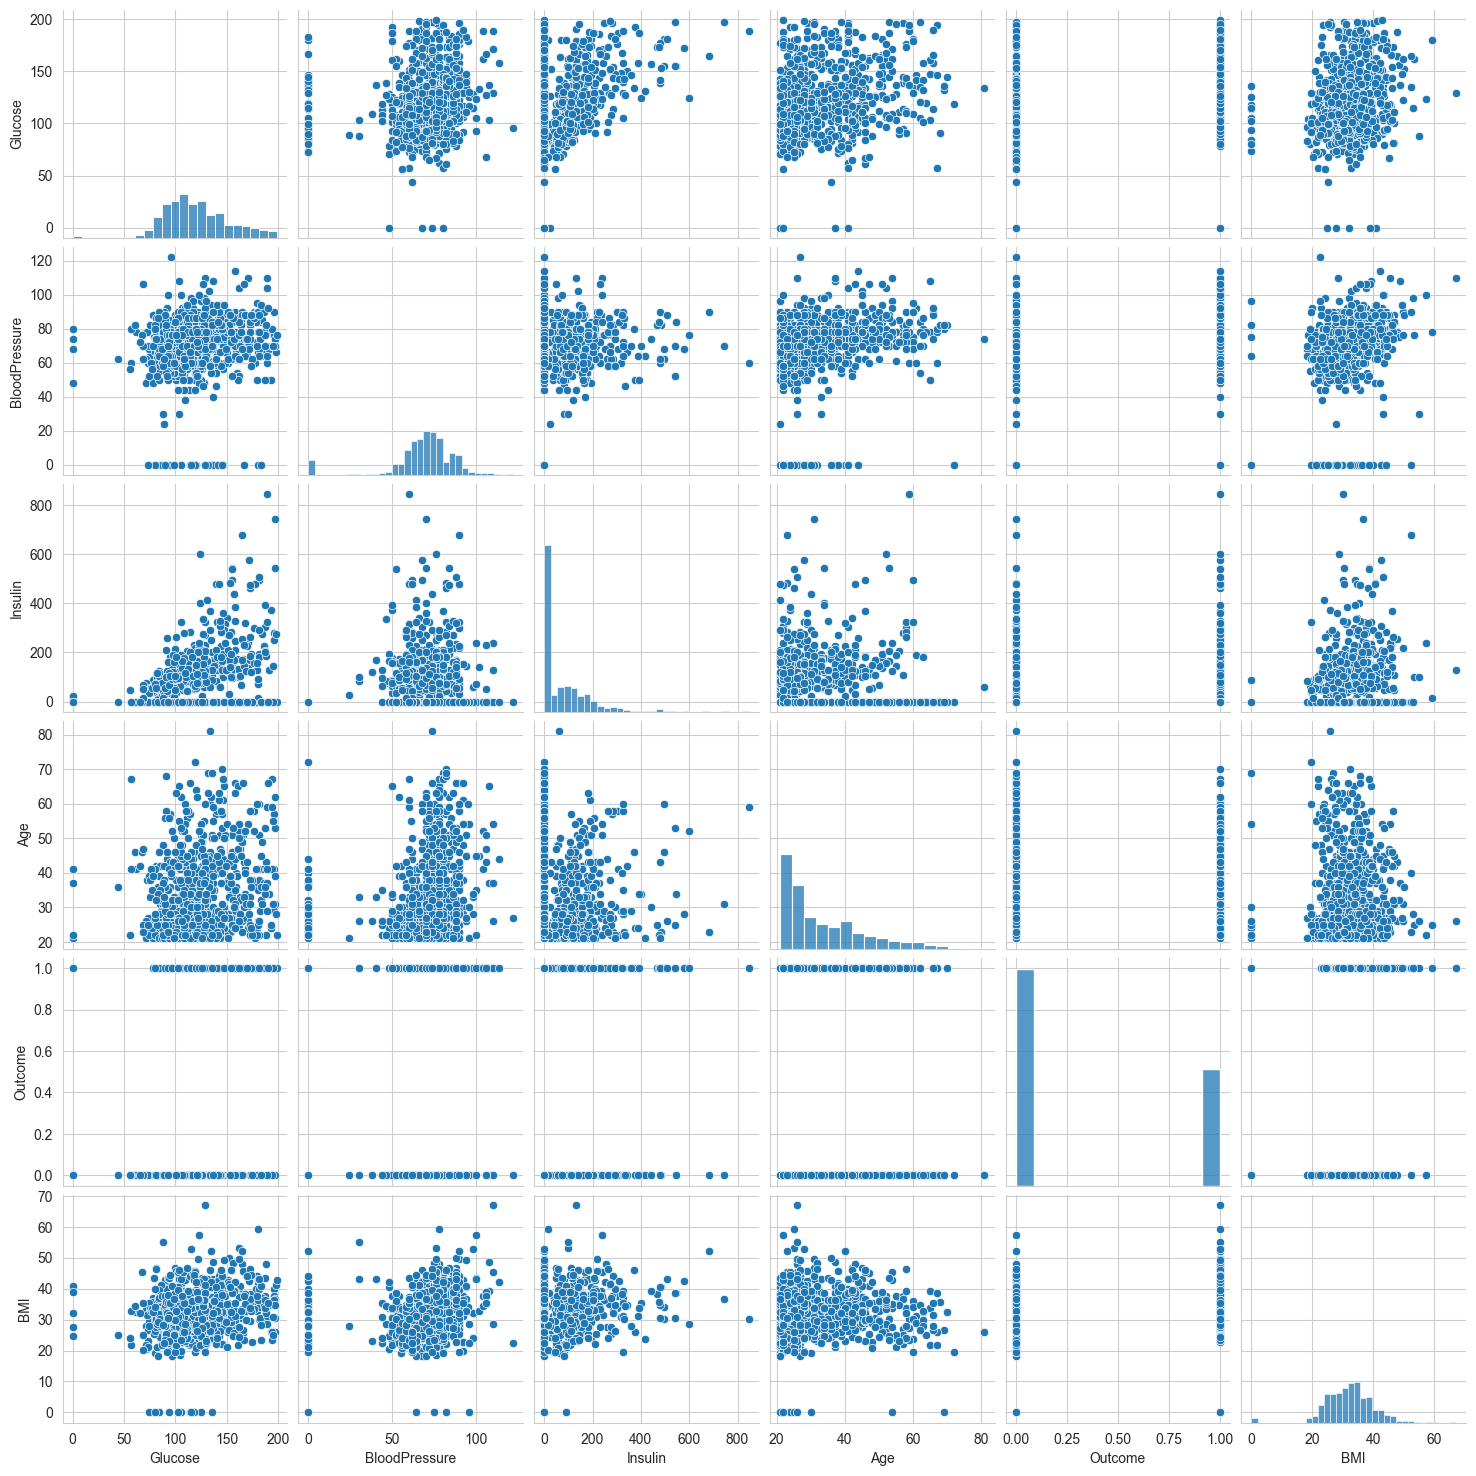

In [20]:
 
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')


<Axes: xlabel='Outcome', ylabel='Insulin'>

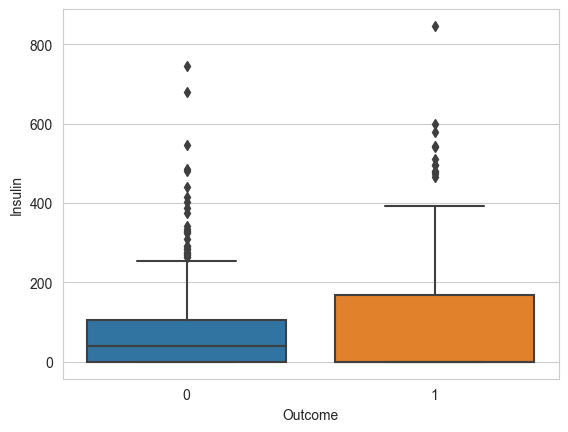

In [21]:
sns.boxplot(x='Outcome',y='Insulin',data=data)



<Axes: xlabel='BMI', ylabel='Glucose'>

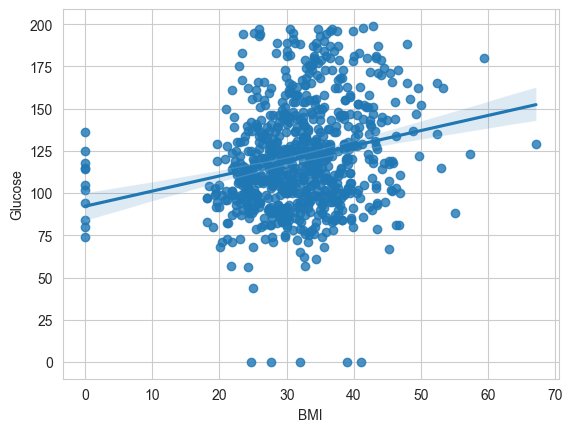

In [22]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

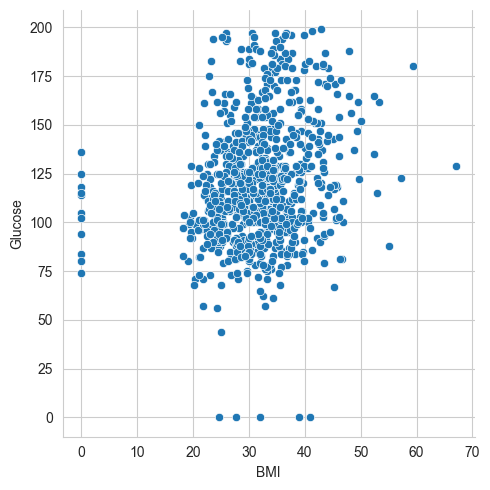

In [23]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

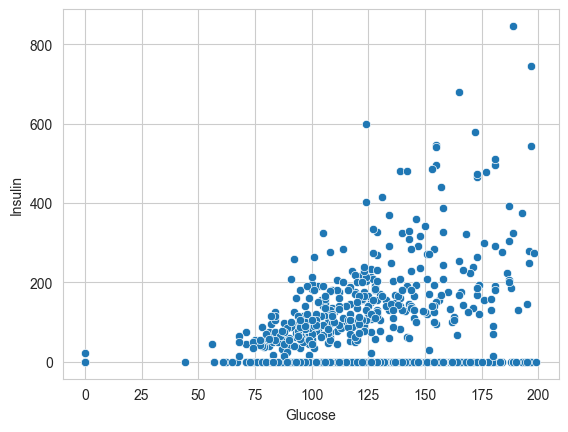

In [24]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

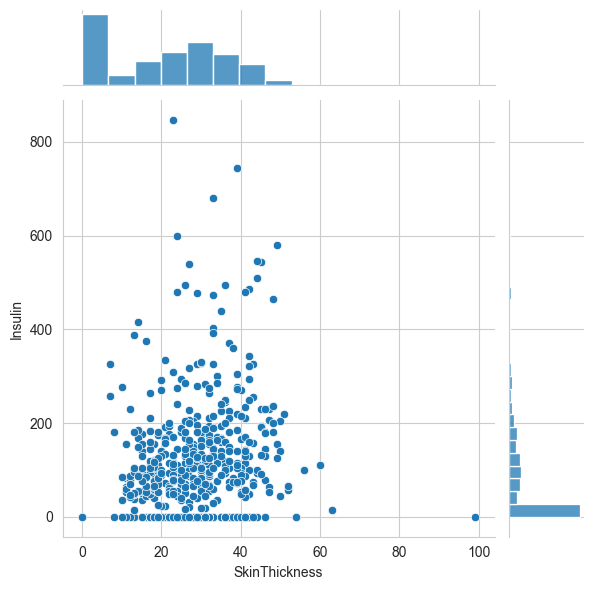

In [25]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

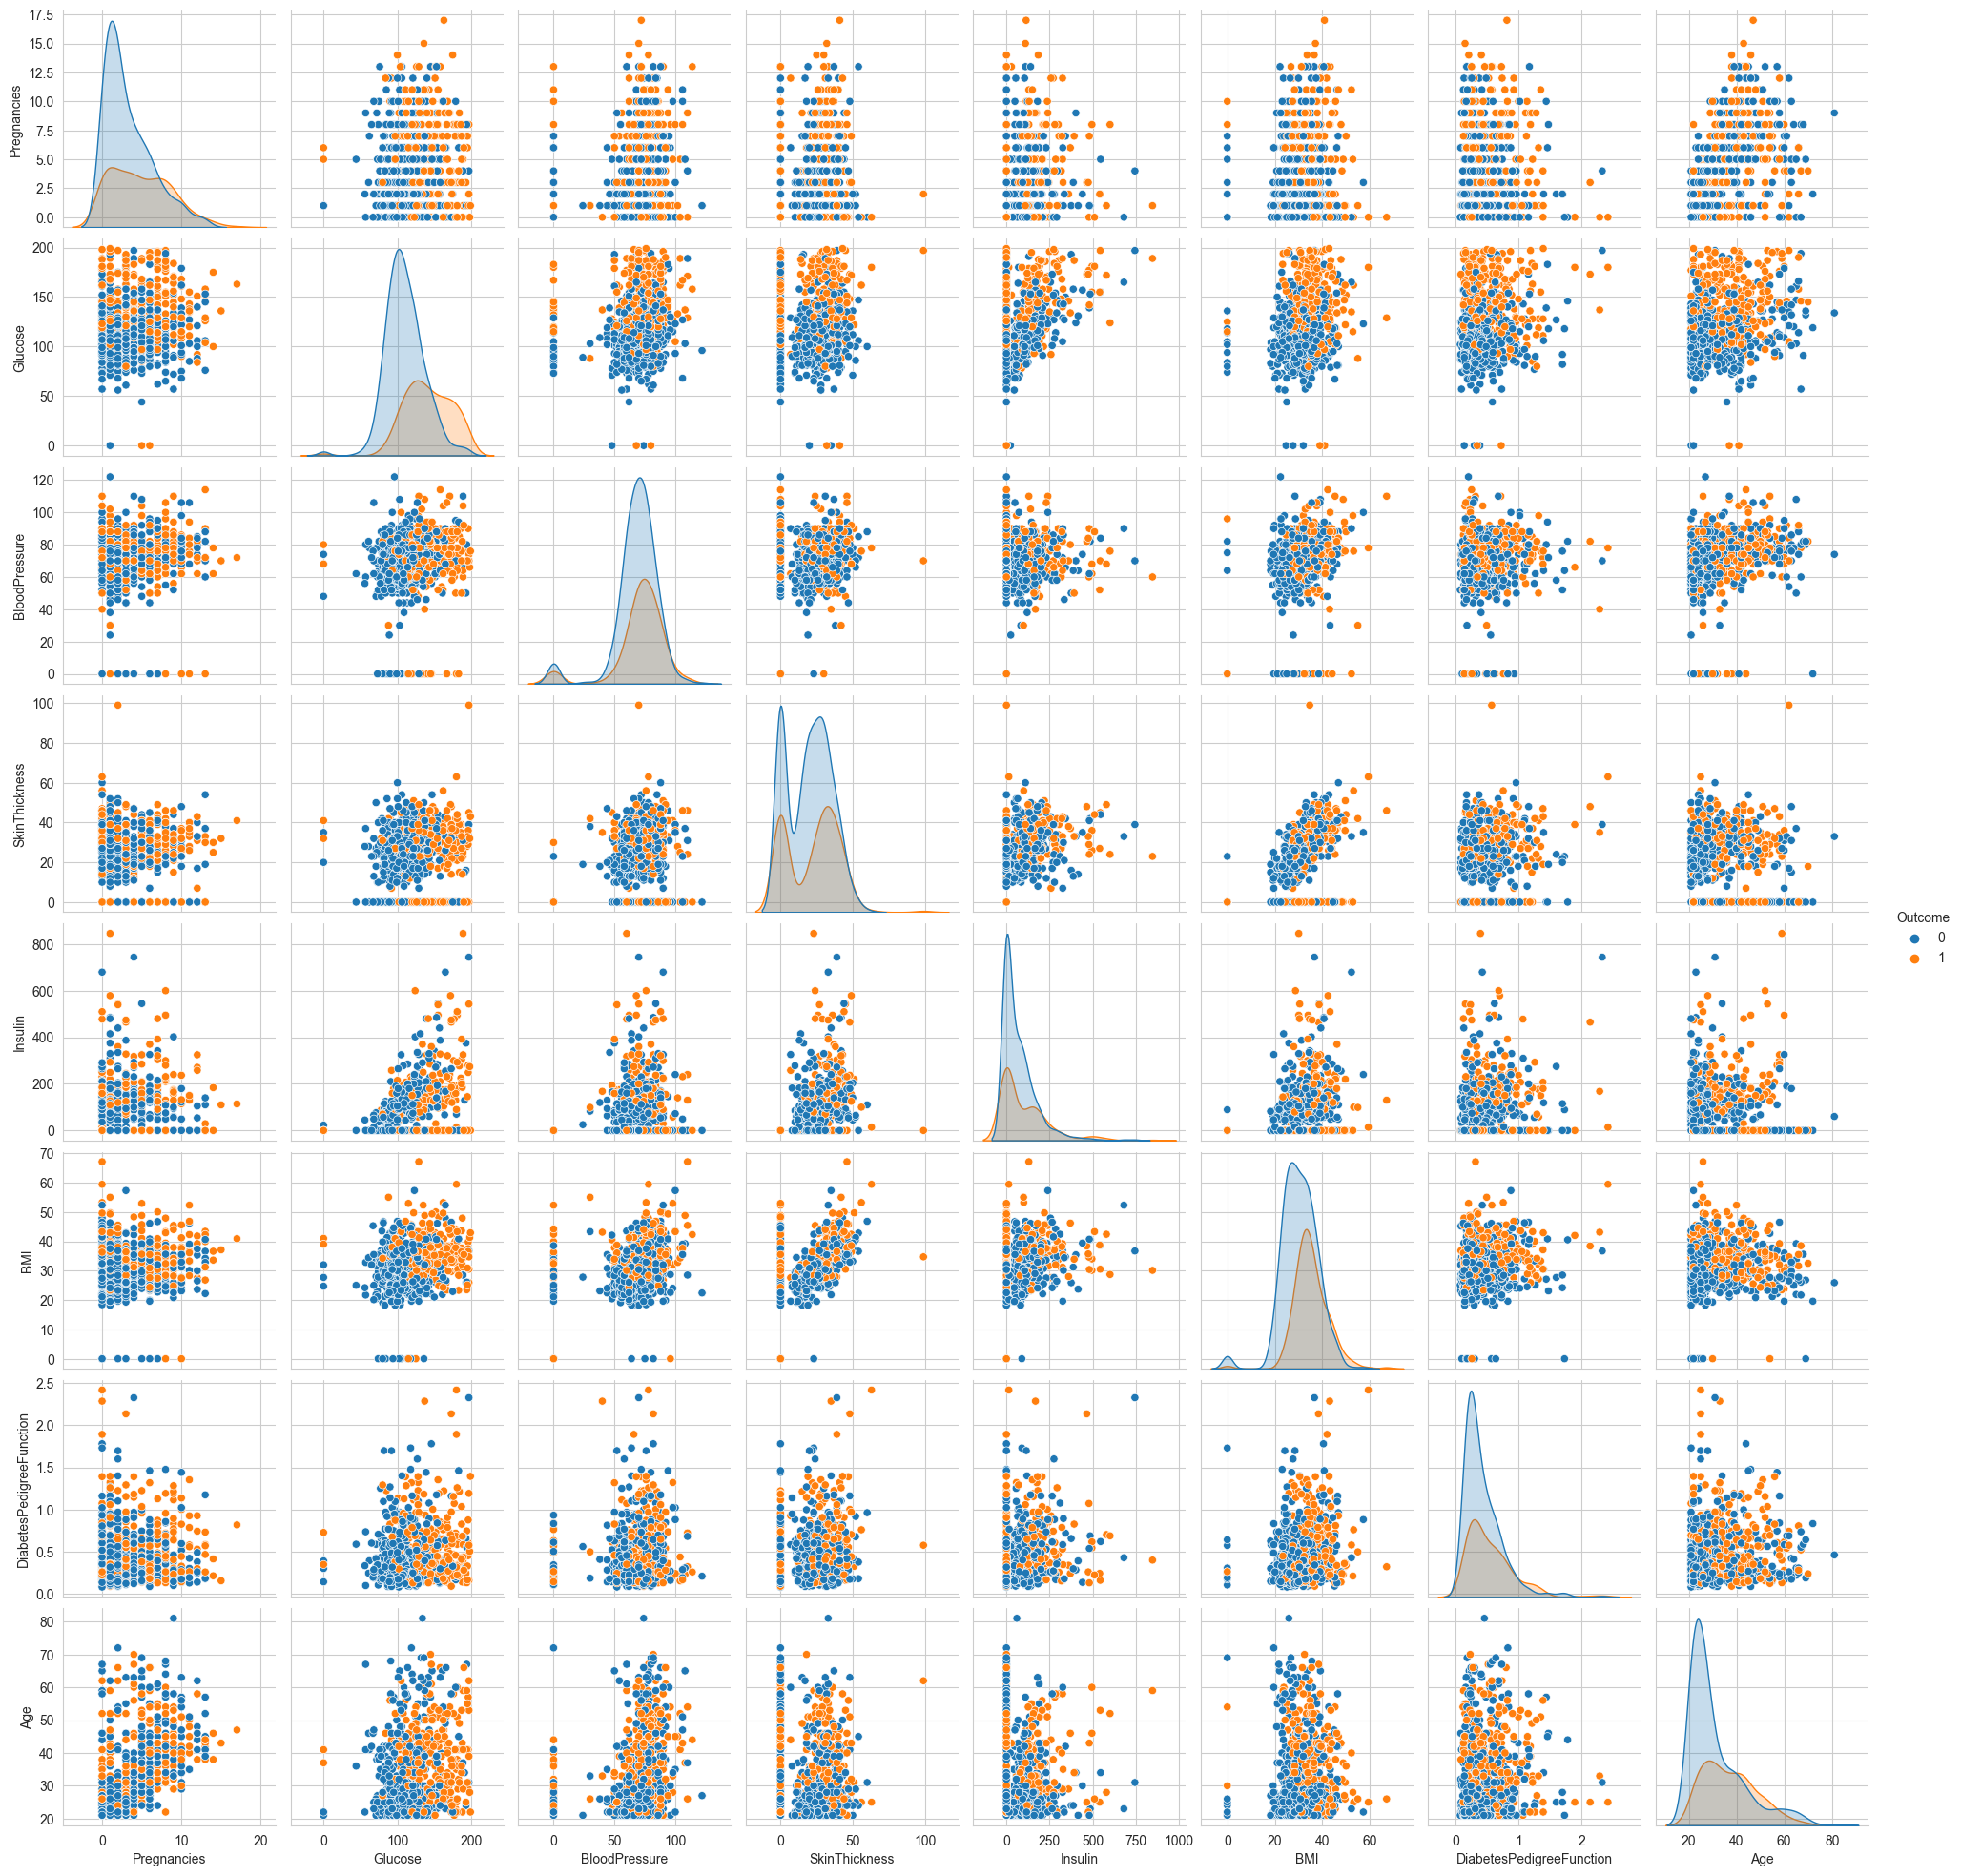

In [26]:
sns.pairplot(data,hue='Outcome')


<Axes: xlabel='Glucose', ylabel='Insulin'>

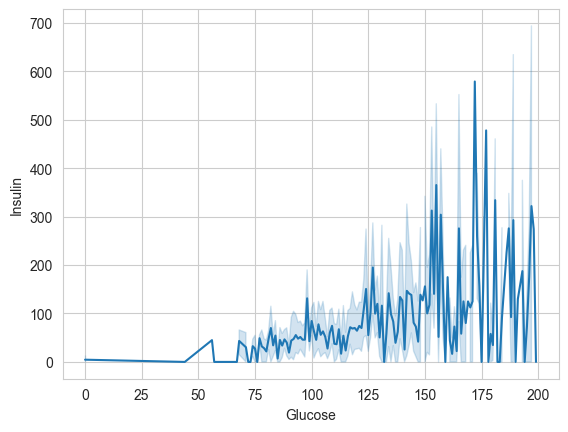

In [27]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

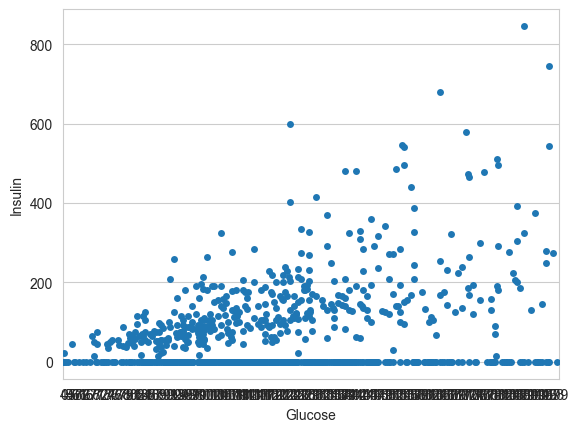

In [28]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

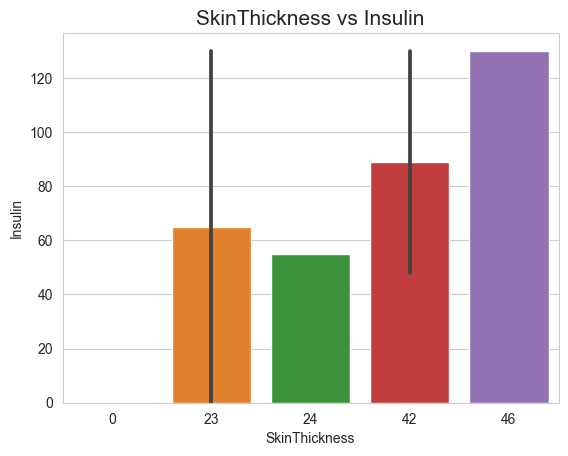

In [29]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")


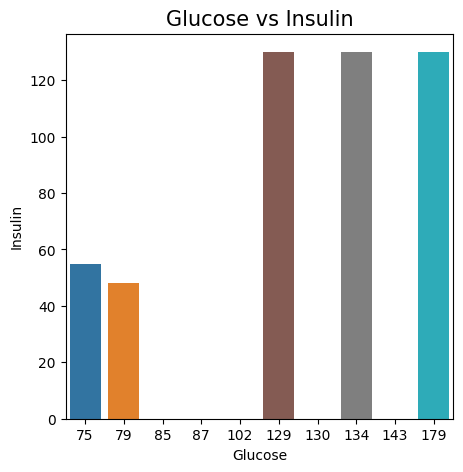

In [30]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()


<a id="import"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | TRAINING AND TESTING DATA</p>

In [31]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [32]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


614
154
614
154


<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 |  Model Building</p>

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.1 |  LogisticRegression Model Building</p>

In [33]:
log = LogisticRegression()
log.fit(x_train,y_train)                         

LogisticRegression()

In [34]:
y_pred_log=log.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_log))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [35]:
print(accuracy_score(y_test,y_pred_log)*100)

82.46753246753246


**So we get a accuracy score of 82.46 % using Logistic Regression**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.2 |  KNeighborsClassifier Model Building</p>

In [36]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [37]:
y_pred_knn=knn.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_knn))


Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154



In [38]:
print(accuracy_score(y_test,y_pred_knn)*100)



75.97402597402598


**So we get a accuracy score of 75.97 % using KNeighborsClassifier**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.3 |  SVC Model Building</p>

In [39]:
svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [40]:
y_pred_svc=svc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_svc))



Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [41]:
print(accuracy_score(y_test,y_pred_svc)*100)


79.22077922077922


**So we get a accuracy score of 79.22 % using SVC**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.4 |  Naive Bayes Model Building</p>

In [42]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [43]:
y_pred_gnb=gnb.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_gnb))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [44]:
print(accuracy_score(y_test,y_pred_gnb)*100)

79.22077922077922


**So we get a accuracy score of 75.73 % using Naiye Bayes**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.5 |  DecisionTreeClassifier Model Building</p>

In [45]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [46]:
y_pred_dtc=dtree.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_dtc))


Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154



In [47]:
print(accuracy_score(y_test,y_pred_dtc)*100)



73.37662337662337


**So we get accuracy score of 73.37 % using DecisionTreeClassifier**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.6 |  RandomForestClassifier Model Building</p>  

In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [49]:
y_pred_rfc=rfc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_rfc))


Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



In [50]:
print(accuracy_score(y_test,y_pred_rfc)*100)

80.51948051948052


**So we get a accuracy score of 81.18 % using RandomForestClassifier**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.7 |  Gradient Boosting Classifier Model Building</p>

In [51]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [52]:
y_pred_gbc=gbc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))


Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [53]:
print(accuracy_score(y_test,y_pred_gbc)*100)

81.16883116883116


**So we get a accuracy score of 81.81 % using GradientBoostingClassifier**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.8 |  XGBClassifier Model Building</p> 

In [54]:
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
y_pred_xgb=xgb.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_xgb))


Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83       107
           1       0.70      0.15      0.25        47

    accuracy                           0.72       154
   macro avg       0.71      0.56      0.54       154
weighted avg       0.72      0.72      0.65       154



In [56]:
xbg_accuracy=print(accuracy_score(y_test,y_pred_xgb)*100)

72.07792207792207


**So we get a accuracy score of 78.57 % using XGBClassifier**

<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.9 |  ExtraTreesClassifier Model Building</p>

In [57]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [58]:
y_pred_etc=etc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred_etc))


Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [59]:
print(accuracy_score(y_test,y_pred_etc)*100)

80.51948051948052


<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 |  DataFrame Model </p> 

 **So we get a accuracy score of 80.51 % using ExtraTreesClassifier**

In [67]:
models = ["LogisticRegression", "KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","XGBClassifier","ExtraTreesClassifier"]
accuracies = [accuracy_score(y_test,y_pred_log)*100,
              accuracy_score(y_test,y_pred_knn)*100,
              accuracy_score(y_test,y_pred_svc)*100,
              accuracy_score(y_test,y_pred_gnb)*100,
              accuracy_score(y_test,y_pred_dtc)*100,
              accuracy_score(y_test,y_pred_rfc)*100,
              accuracy_score(y_test,y_pred_gbc)*100,
              accuracy_score(y_test,y_pred_xgb)*100,
              accuracy_score(y_test,y_pred_etc)*100]


# Create the DataFrame
df = pd.DataFrame({
    "Model": models,
    "Accuracy (%)": accuracies
})

df = df.sort_values(by='Accuracy (%)', ascending=False)
df

,Model,Accuracy (%)
0,LogisticRegression,82.467532
6,GradientBoostingClassifier,81.168831
5,RandomForestClassifier,80.519481
8,ExtraTreesClassifier,80.519481
2,SVC,79.220779
3,GaussianNB,79.220779
1,KNeighborsClassifier,75.974026
4,DecisionTreeClassifier,73.376623
7,XGBClassifier,72.077922


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:red">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>LogisticRegression</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:grey">So, We choose <mark> LogisticRegression </mark></span>
</div>

# LOC ROWS

In [72]:
data.loc[200:200:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
200,0,113,80,16,0,31.0,0.874,21,0


<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 |  Making a Predictive System </p>  

In [75]:
input_data = (0,113,80,16,0,31.0,0.874,21)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = log.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have Diabetes')
else:
    print('The person have a Diabetes')

[0]
The person do not have Diabetes


<a id="svm"></a>
# <p style="background-color:orange; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |  Saving the trained model </p>  

In [76]:
import pickle

In [77]:
filename = 'diabetes_model.sav'
pickle.dump(log, open(filename, 'wb'))

In [78]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [85]:
input_data = (0,113,80,16,0,31.0,0.874,21)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have Diabetes')
else:
    print('The person have a Diabetes')

[0]
The person do not have Diabetes


In [81]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
